In [2]:
from rfm_deployment.query_comercios_2 import *
import cx_Oracle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
import cairo
import gi
gi.require_version('Gtk', '3.0')
from gi.repository import Gtk

%matplotlib inline

In [5]:
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)

In [3]:
con = cx_Oracle.connect('MMONTERO_DIS/Data1234@//cluster-dwhAIX-scan:1521/dwh_app_service', encoding = 'utf8')
#Acceso al data Warehouse @DWTNPROD_AIX.WORLD desde fuera de Naranja

In [4]:
cur = con.cursor() #creo un cursor

In [6]:
inicio = datetime.date(2020, 1, 25)
fin = datetime.date(2019, 11, 25)
months = -1

In [6]:
fecha_final = add_months(inicio, -2)
contador = 1

while fecha_final >= fin :
    
    fi_int = datetime_to_integer(inicio)
    ff_int = datetime_to_integer(fecha_final)
    print(f'Ciclo--{contador}:')
    print(f'La fecha de inicio es: {inicio}. La fecha final es: {fecha_final}.' )
    fecha_init = inicio.strftime('%d/%m/%Y')
    #fecha_init_month = inicio.strftime('%m/%Y')
    fecha_end = add_months(fecha_final, months).strftime('%d/%m/%Y')
    query = f_query(fi_int, ff_int, fecha_init, fecha_end)
    fecha_out = str(ff_int)
    fecha_in = str(fi_int)
    df = consulta_DW(query, cur, fecha_in, fecha_out)
    print('=================================================================================================')

    inicio = add_months(inicio, months)
    fecha_final = add_months(fecha_final, months)
    contador += 1


Ciclo--1:
La fecha de inicio es: 2020-01-25. La fecha final es: 2019-11-25.


In [3]:
df = pd.read_parquet('ca_2_20200125--20191125.parquet')

In [4]:
df

,RUBRO_DESCRIPCION,COMERCIO_DESCRIPCION,CUIT,RUBRO,IMPORTE,FECHA,SEGMENTO
0,TELEFONIA,CLARO PAGO TELEFONICO,30663288497,566,300.00,2020-01-23,Grandes comercios
1,TELEFONIA,CLARO PAGO TELEFONICO,30663288497,566,1278.81,2020-01-14,Grandes comercios
2,TELEFONIA,CLARO EQUIPOS VENTA PRESENCIAL,30663288497,566,17999.01,2020-01-11,Grandes comercios
3,TELEFONIA,CLARO EQUIPOS VENTA PRESENCIAL,30663288497,566,13999.00,2019-12-26,Grandes comercios
4,TELEFONIA,CLARO PAGO TELEFONICO,30663288497,566,300.00,2019-12-26,Grandes comercios
...,...,...,...,...,...,...,...
18222138,FARMACIAS,FARMACIA SANTA RITA,27112127661,220,686.00,2019-12-27,CA
18222139,AGENCIAS DE VIAJES,COA COR VIAJES Y TURISMO,30546244721,20,650.00,2020-01-02,Grandes comercios
18222140,ALMACENES-DESPENSAS-AUTOSERVICIOS.,MINIMERCADO TITO,27167826062,116,550.00,2020-01-12,PCA
18222141,INDUMENTARIA DEPORTIVA,ROSSI ROSSI,30711383138,155,2599.00,2020-01-06,TOP


In [5]:
df.isnull().sum()

RUBRO_DESCRIPCION          0
COMERCIO_DESCRIPCION       0
CUIT                       0
RUBRO                      0
IMPORTE                    0
FECHA                      0
SEGMENTO                1589
dtype: int64

In [6]:
sin_segmento = df[df['SEGMENTO'].isnull()]

In [8]:
sin_segmento['COMERCIO_DESCRIPCION'].value_counts()

MUNICIPALIDAD DE RIVADAVIA       420
EESS CAMINO DEL PERU COMBUST.    211
LA PROVEEDURIA MUTUAL            189
TOP SHOP                         161
AUTOSERVICIO LOS ENRIQUES         91
                                ... 
HOTEL 376                          1
APAPACHAME                         1
SHERLOCK TOYS                      1
MADERAS JUNIN                      1
PASARELA KIDS                      1
Name: COMERCIO_DESCRIPCION, Length: 110, dtype: int64

In [10]:
list(sin_segmento['COMERCIO_DESCRIPCION'].unique())

['OPTICA OCCHIO',
 'ELSETEC SAS',
 'DOROTEA CALZADOS',
 'TREX BAGS',
 'CASA COSTA',
 'TROPIC SA',
 'CASA LETI',
 'EESS CAMINO DEL PERU COMBUST.',
 'FARMACIA RONCERO',
 'PILCHERIA LA NUEVA',
 'MATETE OBJETOS',
 'SANTA',
 'RPDNEXT',
 'NEW LUBRAX',
 'GUAPPITA',
 'FARMACIA BERNAY',
 'REPUESTOS 2000',
 'TOUBA CA&ADA',
 'NEUMATICOS GRIP',
 'SECCOPLAC AVELLANEDA',
 'BARCHIESI ARTURO DANTE',
 'TRUCAMJET',
 'MDZ XL CELULARES',
 'CORRALON Y FERRETERIA LAPUEBLA',
 'IT! ITALY',
 'NEUMATICOS DEL VALLE',
 'JM BIKE SAS',
 'SUPERMERCADO MAFER SAS',
 'LAS MIL OFERTAS',
 "ELEGANT'S BOUTIQUE",
 'MERCADITO LOS HERMANOS',
 'MUNDO ANIMAL',
 'CARA & CRUZ',
 'NOEMI SHOP',
 'MUNICIPALIDAD DE RIVADAVIA',
 'FERRETERIA INDUSTRIAL EL GURI',
 'FARMACIA SAN MARTIN',
 'PATAGONIAN PETS',
 'J&D',
 'SUAVE DESPERTAR COLCHONES Y BLANCO',
 'GERONIMO DIAZ VELEZ',
 'TURBOS LYNX',
 'NEURUS SERVICE & REPUESTOS',
 'OPTICA JUAN CARLOS LA CONSULTA',
 'ROUGE ZAPATERIA RIO CUARTO',
 'DISTRIBUIDORA LA POSTA',
 'FIOMA',
 'MECANBIKE',

In [12]:
df['SEGMENTO'].value_counts()

CA TOP                         8250002
Grandes Clientes Nacionales    6169449
PEQUEÑOS CA                    3844872
CA                             3395202
Name: SEGMENTO, dtype: int64

In [13]:
pca = df[df['SEGMENTO'] == 'PEQUEÑOS CA'].copy()
ca = df[df['SEGMENTO'] == 'CA'].copy()
ca_top = df[df['SEGMENTO'] == 'CA TOP'].copy()
g_CN = df[df['SEGMENTO'] == 'Grandes Clientes Nacionales'].copy()

In [14]:
pca['FECHA'] = pca['FECHA'].apply(lambda x: str(x))
ca['FECHA'] = ca['FECHA'].apply(lambda x: str(x))
ca_top['FECHA'] = ca_top['FECHA'].apply(lambda x: str(x))
g_CN['FECHA'] = g_CN['FECHA'].apply(lambda x: str(x))

In [15]:
def RScore(x,p,d):   
    
    """Funcion para obtener el Recency score. x es cada registro de la serie rfm['RECENCIA'] y d[p] es la serie quantile['RECENCIA'] """
    
    if x <= d[p][0.20]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1

def FMScore(x,p,d):  
    
    """Funcion para obtener el score para la frecuencia y para el monto"""
    
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

In [16]:
def RFM(df, inicio, label):
    rfm = df[['CUIT', 'IMPORTE', 'FECHA' ]].copy()    
    rfm['FECHA'] = rfm['FECHA'].apply(lambda x: (datetime.datetime.strptime(inicio.strftime('%Y-%m-%d'), '%Y-%m-%d') - 
                                             datetime.datetime.strptime(x, '%Y-%m-%d' )).days)
    rfm_model = rfm.groupby('CUIT').agg({'CUIT': 'count', 'IMPORTE': 'sum', 'FECHA': 'min'})
    rfm_model = rfm_model.rename(columns={'CUIT':'FRECUENCIA', 'IMPORTE':'MONTO', 'FECHA':'RECENCIA'})
    #rfm_model.to_csv('RFM_mensual.csv', index = True)
    
    quantile = rfm_model[['RECENCIA', 'MONTO', 'FRECUENCIA']].quantile(q=[0.2,0.4,0.6,0.8])
    
    
    rfm_model['R_Quintil'] = rfm_model['RECENCIA'].apply(RScore,args=('RECENCIA',quantile))
    rfm_model['F_Quintil'] = rfm_model['FRECUENCIA'].apply(FMScore, args=('FRECUENCIA',quantile))
    rfm_model['M_Quintil'] = rfm_model['MONTO'].apply(FMScore, args=('MONTO',quantile))
    
    
    rfm_model['RFMScore'] = rfm_model.R_Quintil.map(str) \
                            + rfm_model.F_Quintil.map(str) \
                            + rfm_model.M_Quintil.map(str)
    
    rfm_model['Total_score'] = rfm_model['R_Quintil'] + rfm_model['F_Quintil'] + rfm_model['M_Quintil']
    rfm_model.to_csv(f'RFM_trimestral_2_{label}.csv', index = True)
    

In [17]:
dic_segmentos = {'pca': pca, 'ca': ca, 'ca_top': ca_top, 'g_CN': g_CN}
for i,k in dic_segmentos.items():
    label = i
    RFM(k,inicio, label)

In [87]:
lista = []

In [88]:
len(lista)

0

In [54]:
rfm_model = pd.read_csv('RFM_trimestral_2_pca.csv')

In [55]:
rfm_model

,CUIT,FRECUENCIA,MONTO,RECENCIA,R_Quintil,F_Quintil,M_Quintil,RFMScore,Total_score
0,20005784914,5,1907.00,39,1,2,1,121,4
1,20008733601,106,58441.90,4,4,5,5,455,14
2,20027996338,3,24095.00,8,4,2,4,424,10
3,20028994924,3,2749.00,9,3,2,1,321,6
4,20029782181,95,73331.03,1,5,5,5,555,15
...,...,...,...,...,...,...,...,...,...
28590,33715249699,113,176658.00,2,5,5,5,555,15
28591,33999256029,22,90960.00,1,5,4,5,545,14
28592,34531338652,27,127276.00,8,4,5,5,455,14
28593,34614925363,12,14752.00,17,2,3,3,233,8


In [56]:
rfm_model[['RECENCIA', 'FRECUENCIA', 'MONTO']].corr()

,RECENCIA,FRECUENCIA,MONTO
RECENCIA,1.000000,-0.012927,-0.012673
FRECUENCIA,-0.012927,1.000000,0.967215
MONTO,-0.012673,0.967215,1.000000


In [57]:
def histogramas(R_serie, F_serie, M_serie):
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 8.27))
    plt.subplots_adjust(wspace = 0.4)
    fig.suptitle('Distribución de clientes según Recencia, Frecuencia y Monto')
    ax1.hist(R_serie, bins = 90, range = [0,50] , facecolor = 'green', alpha = 0.75, 
             edgecolor = 'black', linewidth = 0.5 )
    ax1.set(xlabel='Recencia (días)', ylabel = 'Cantidad')
    ax1.tick_params(axis='both', labelrotation = 45)
    ax2.hist(F_serie, bins = 1000, range = [0,1000] , facecolor = 'blue', alpha = 0.75, 
             edgecolor = 'black', linewidth = 0.5 )
    ax2.set(xlabel='Frecuencia')
    ax2.tick_params(axis='both', labelrotation = 45)
    ax3.hist(M_serie, bins = 1000, range = [0,5000000] , facecolor = 'red', alpha = 0.75, 
             edgecolor = 'black', linewidth = 0.5 )
    ax3.set(xlabel='Monto (Pesos)')
    ax3.tick_params(axis='both', labelrotation = 45)
    
    plt.show()

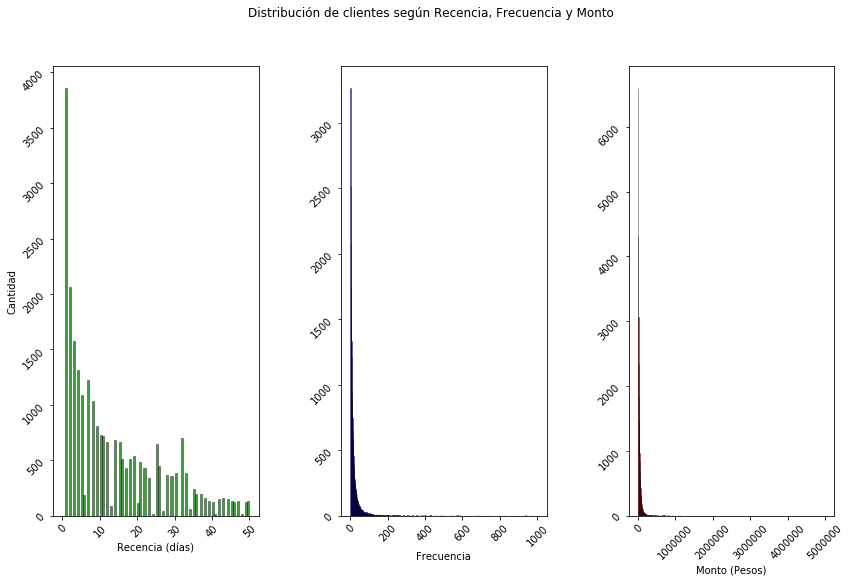

In [58]:
histogramas(rfm_model['RECENCIA'], rfm_model['FRECUENCIA'], rfm_model['MONTO'])

In [59]:
def label_segmentos(rfm, fecha_in, fecha_out):
    
    """Función que segmenta los clientes según su Frecuencia y Recencia en 10 grupos. Además se crea un diccionario
    con los dni's en cada categoría en el intervalo de tiempo analizado. Finalmente genera un barplot con la fracción
    de clientes en cada categoría. Requiere como argumentos 'rfm' que es el dataframe final obtenido por la función 
    rfm_scoring y 'fecha_in' y 'fecha_out', strings de las fechas 'fi_int' y 'ff_int' para poder etiquetar el nombre 
    del dataframe guardado. """
    
    segt_map = {
    r'[1-2][1-2]': 'Hibernando',
    r'[1-2][3-4]': 'En Riesgo',
    r'[1-2]5': 'No se pueden perder',
    r'3[1-2]': 'Cercanos a Hibernar',
    r'33': 'Necesitan Atencion',
    r'[3-4][4-5]': 'Leales',
    r'41': 'Prometedores',
    r'51': 'Reciente operativo',
    r'[4-5][2-3]': 'Potencialmente Leales',
    r'5[4-5]': 'Campeones'
    }
    rfm['Segment'] = rfm['R_Quintil'].map(str) + rfm['F_Quintil'].map(str)
    rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

    rfm.to_csv(f'rfm-segmentos-{fecha_in}--{fecha_out}.csv', index = False)
    lista_segmentos = pd.unique(rfm['Segment']).tolist()
  
    dic_cuit = {}
    for i in lista_segmentos:
        dic_cuit[i]=rfm[rfm['Segment']==i]['CUIT'].to_list()
        
    #print('La cantidad de campeones es de: {}'.format(len(dic_cuit['Campeones'])))
    #print('La cantidad de clientes en riesgo es de: {}'.format(len(dic_cuit['En Riesgo'])))
    #print('La cantidad de clientes recientes operativos es de: {}'.format(len(dic_cuit['Reciente operativo'])))
    #print('La cantidad de clientes leales es de: {}'.format(len(dic_cuit['Leales'])))
    #print('La cantidad de clientes potencialmente leales es de: {}'.format(len(dic_cuit['Potencialmente Leales'])))
    #print('La cantidad de clientes hibernando es de: {}'.format(len(dic_cuit['Hibernando'])))
    #print('La cantidad de clientes que necesitan atencion es de: {}'.format(len(dic_cuit['Necesitan Atencion'])))
    #print('La cantidad de clientes a punto de hibernar es de: {}'.format(len(dic_cuit['Cercanos a Hibernar'])))
    #print('La cantidad de clientes que no se pueden perder es de: {}'.format(len(dic_cuit['No se pueden perder'])))
    #print('La cantidad de clientes prometedores es de: {}'.format(len(dic_cuit['Prometedores'])))
    
    rfm_segmentado = rfm[['Segment','CUIT']].groupby('Segment').count()
    rfm_segmentado = rfm_segmentado.rename(columns={'CUIT': 'cantidad'})
    rfm_segmentado['%'] = rfm_segmentado['cantidad']/rfm.shape[0] * 100
    lista = ['Campeones', 'Leales', 'Potencialmente Leales', 'Reciente operativo', 'Prometedores', 'No se pueden perder',
        'En Riesgo', 'Necesitan Atencion', 'Cercanos a Hibernar', 'Hibernando']
    rfm_segmentado = rfm_segmentado.reindex(lista)
    rfm_segmentado.to_csv(f'segment-plot-{fecha_in}--{fecha_out}.csv')

    
    return rfm


In [60]:
fecha_in = '20200125'
fecha_out = '20191125'

In [61]:
rfm_segmentos = label_segmentos(rfm_model, fecha_in, fecha_out)

In [62]:
rfm_segmentos

,CUIT,FRECUENCIA,MONTO,RECENCIA,R_Quintil,F_Quintil,M_Quintil,RFMScore,Total_score,Segment
0,20005784914,5,1907.00,39,1,2,1,121,4,Hibernando
1,20008733601,106,58441.90,4,4,5,5,455,14,Leales
2,20027996338,3,24095.00,8,4,2,4,424,10,Potencialmente Leales
3,20028994924,3,2749.00,9,3,2,1,321,6,Cercanos a Hibernar
4,20029782181,95,73331.03,1,5,5,5,555,15,Campeones
...,...,...,...,...,...,...,...,...,...,...
28590,33715249699,113,176658.00,2,5,5,5,555,15,Campeones
28591,33999256029,22,90960.00,1,5,4,5,545,14,Campeones
28592,34531338652,27,127276.00,8,4,5,5,455,14,Leales
28593,34614925363,12,14752.00,17,2,3,3,233,8,En Riesgo


In [63]:
class RFM_graph(Gtk.Window):

    def __init__(self):
        self.porcentajes = {
                           'Campeones': 0.00,
                           'Leales': 0.00,
                           'Potencialmente Leales': 0.00,
                           'Reciente operativo': 0.00,
                           'Prometedores': 0.00,
                           'Necesitan Atencion': 0.00,
                           'Cercanos a Hibernar': 0.00,
                           'No se pueden perder': 0.00,
                           'En Riesgo': 0.00,
                           'Hibernando': 0.00
                           }
        
        self.cantidad = {
                           'Campeones': 0.00,
                           'Leales': 0.00,
                           'Potencialmente Leales': 0.00,
                           'Reciente operativo': 0.00,
                           'Prometedores': 0.00,
                           'Necesitan Atencion': 0.00,
                           'Cercanos a Hibernar': 0.00,
                           'No se pueden perder': 0.00,
                           'En Riesgo': 0.00,
                           'Hibernando': 0.00
                           }
        
        self.R_MEDIAN = {
                           'Campeones': 0.00,
                           'Leales': 0.00,
                           'Potencialmente Leales': 0.00,
                           'Reciente operativo': 0.00,
                           'Prometedores': 0.00,
                           'Necesitan Atencion': 0.00,
                           'Cercanos a Hibernar': 0.00,
                           'No se pueden perder': 0.00,
                           'En Riesgo': 0.00,
                           'Hibernando': 0.00
                           }
            
        self.F_MEDIAN = {
                           'Campeones': 0.00,
                           'Leales': 0.00,
                           'Potencialmente Leales': 0.00,
                           'Reciente operativo': 0.00,
                           'Prometedores': 0.00,
                           'Necesitan Atencion': 0.00,
                           'Cercanos a Hibernar': 0.00,
                           'No se pueden perder': 0.00,
                           'En Riesgo': 0.00,
                           'Hibernando': 0.00
                           }
                
        self.M_MEDIAN = {
                           'Campeones': 0.00,
                           'Leales': 0.00,
                           'Potencialmente Leales': 0.00,
                           'Reciente operativo': 0.00,
                           'Prometedores': 0.00,
                           'Necesitan Atencion': 0.00,
                           'Cercanos a Hibernar': 0.00,
                           'No se pueden perder': 0.00,
                           'En Riesgo': 0.00,
                           'Hibernando': 0.00
                           }
       
       
        super(RFM_graph, self).__init__()
        self.init_ui()
        self.load_image()
       
    def init_ui(self):    
        darea = Gtk.DrawingArea()
        darea.connect("draw", self.on_draw)
        self.add(darea)

        self.set_title("Summary")
        self.resize(1040, 1700)
        self.set_position(Gtk.WindowPosition.CENTER)
        self.connect("delete-event", Gtk.main_quit)
        self.show_all()
       
    def load_image(self):
        self.ims = cairo.ImageSurface.create_from_png("background_rfm_gimp.png")
       
    def on_draw(self, wid, cr):
        
        scale = 1.
        cr = cairo.Context(self.ims)
        #cr.scale(scale, scale)    # scale the context by (x, y)
        #cr.set_source_surface(self.ims, 10, 10)
        #cr.paint()
        #cr.restore()
       
        # Acá va el texto y su configuración
       
        cr.set_source_rgb(0, 0, 0)

        cr.select_font_face("sans-serif", cairo.FONT_SLANT_NORMAL,
            cairo.FONT_WEIGHT_NORMAL)
        cr.set_font_size(11)
        f_corr = scale / 0.5
      
        
        cr.move_to(115 * f_corr, 35 * f_corr)
        cr.show_text(f"pop: {self.cantidad['No se pueden perder']} comercios ({self.porcentajes['No se pueden perder']})")
        cr.move_to(115 * f_corr, 140 * f_corr)
        cr.show_text(f"pop: {self.cantidad['En Riesgo']} comercios ({self.porcentajes['En Riesgo']})")
        cr.move_to(115 * f_corr, 263 * f_corr)
        cr.show_text(f"pop: {self.cantidad['Hibernando']} comercios ({self.porcentajes['Hibernando']})")
        cr.move_to(380 * f_corr, 80 * f_corr)
        cr.show_text(f"pop: {self.cantidad['Leales']} comercios ({self.porcentajes['Leales']})")
        cr.move_to(570 * f_corr, 80 * f_corr)
        cr.show_text(f"pop: {self.cantidad['Campeones']} comercios ({self.porcentajes['Campeones']})")
        cr.move_to(570 * f_corr, 280 * f_corr)
        cr.show_text(f"pop: {self.cantidad['Reciente operativo']} comercios ({self.porcentajes['Reciente operativo']})")
        cr.move_to(445 * f_corr, 280 * f_corr)
        cr.show_text(f"pop: {self.cantidad['Prometedores']} comercios ({self.porcentajes['Prometedores']})")
        cr.move_to(310 * f_corr, 270 * f_corr)
        cr.show_text(f"pop: {self.cantidad['Cercanos a Hibernar']} comercios ({self.porcentajes['Cercanos a Hibernar']})")
        cr.move_to(310 * f_corr, 160 * f_corr)
        cr.show_text(f"pop: {self.cantidad['Necesitan Atencion']} comercios ({self.porcentajes['Necesitan Atencion']})")
        cr.move_to(515 * f_corr, 200 * f_corr)
        cr.show_text(f"pop: {self.cantidad['Potencialmente Leales']} comercios ({self.porcentajes['Potencialmente Leales']})")

        
        cr.move_to(115 * f_corr, 45 * f_corr)
        cr.show_text(f"R_MEDIAN: {self.R_MEDIAN['No se pueden perder']} días")
        cr.move_to(115 * f_corr, 150 * f_corr)
        cr.show_text(f"R_MEDIAN: {self.R_MEDIAN['En Riesgo']} días")
        cr.move_to(115 * f_corr, 273 * f_corr)
        cr.show_text(f"R_MEDIAN: {self.R_MEDIAN['Hibernando']} días")
        cr.move_to(380 * f_corr, 90 * f_corr)
        cr.show_text(f"R_MEDIAN: {self.R_MEDIAN['Leales']} días")
        cr.move_to(570 * f_corr, 90 * f_corr)
        cr.show_text(f"R_MEDIAN: {self.R_MEDIAN['Campeones']} días")
        cr.move_to(570 * f_corr, 290 * f_corr)
        cr.show_text(f"R_MEDIAN: {self.R_MEDIAN['Reciente operativo']} días")
        cr.move_to(445 * f_corr, 290 * f_corr)
        cr.show_text(f"R_MEDIAN: {self.R_MEDIAN['Prometedores']} días")
        cr.move_to(310 * f_corr, 280 * f_corr)
        cr.show_text(f"R_MEDIAN: {self.R_MEDIAN['Cercanos a Hibernar']} días")
        cr.move_to(310 * f_corr, 170 * f_corr)
        cr.show_text(f"R_MEDIAN: {self.R_MEDIAN['Necesitan Atencion']} días")
        cr.move_to(515 * f_corr, 210 * f_corr)
        cr.show_text(f"R_MEDIAN: {self.R_MEDIAN['Potencialmente Leales']} días")



        
        cr.move_to(115 * f_corr, 55 * f_corr)
        cr.show_text(f"F_MEDIAN: {self.F_MEDIAN['No se pueden perder']}")
        cr.move_to(115 * f_corr, 160 * f_corr)
        cr.show_text(f"F_MEDIAN: {self.F_MEDIAN['En Riesgo']}")
        cr.move_to(115 * f_corr, 283 * f_corr)
        cr.show_text(f"F_MEDIAN: {self.F_MEDIAN['Hibernando']}")
        cr.move_to(380 * f_corr, 100 * f_corr)
        cr.show_text(f"F_MEDIAN: {self.F_MEDIAN['Leales']}")
        cr.move_to(570 * f_corr, 100 * f_corr)
        cr.show_text(f"F_MEDIAN: {self.F_MEDIAN['Campeones']}")
        cr.move_to(570 * f_corr, 300 * f_corr)
        cr.show_text(f"F_MEDIAN: {self.F_MEDIAN['Reciente operativo']}")
        cr.move_to(445 * f_corr, 300 * f_corr)
        cr.show_text(f"F_MEDIAN: {self.F_MEDIAN['Prometedores']}")
        cr.move_to(310 * f_corr, 290 * f_corr)
        cr.show_text(f"F_MEDIAN: {self.F_MEDIAN['Cercanos a Hibernar']}")
        cr.move_to(310 * f_corr, 180 * f_corr)
        cr.show_text(f"F_MEDIAN: {self.F_MEDIAN['Necesitan Atencion']}")
        cr.move_to(515 * f_corr, 220 * f_corr)
        cr.show_text(f"F_MEDIAN: {self.F_MEDIAN['Potencialmente Leales']}")



        
        cr.move_to(115 * f_corr, 65 * f_corr)
        cr.show_text(f"M_MEDIAN: {self.M_MEDIAN['No se pueden perder']} pesos")
        cr.move_to(115 * f_corr, 170 * f_corr)
        cr.show_text(f"M_MEDIAN: {self.M_MEDIAN['En Riesgo']} pesos")
        cr.move_to(115 * f_corr, 293 * f_corr)
        cr.show_text(f"M_MEDIAN: {self.M_MEDIAN['Hibernando']} pesos")
        cr.move_to(380 * f_corr, 110 * f_corr)
        cr.show_text(f"M_MEDIAN: {self.M_MEDIAN['Leales']} pesos")
        cr.move_to(570 * f_corr, 110 * f_corr)
        cr.show_text(f"M_MEDIAN: {self.M_MEDIAN['Campeones']} pesos")
        cr.move_to(570 * f_corr, 310 * f_corr)
        cr.show_text(f"M_MEDIAN: {self.M_MEDIAN['Reciente operativo']} pesos")
        cr.move_to(445 * f_corr, 310 * f_corr)
        cr.show_text(f"M_MEDIAN: {self.M_MEDIAN['Prometedores']} pesos")
        cr.move_to(310 * f_corr, 300 * f_corr)
        cr.show_text(f"M_MEDIAN: {self.M_MEDIAN['Cercanos a Hibernar']} pesos")
        cr.move_to(310 * f_corr, 190 * f_corr)
        cr.show_text(f"M_MEDIAN: {self.M_MEDIAN['Necesitan Atencion']} pesos")
        cr.move_to(515 * f_corr, 230 * f_corr)
        cr.show_text(f"M_MEDIAN: {self.M_MEDIAN['Potencialmente Leales']} pesos")

        
        self.ims.write_to_png ("rfm-trimestral.png")

In [ ]:
fecha_in ='20200125'  # Fecha límite superior para el trimestre de interés
fecha_out ='20191125' # Fecha límite inferior para el trimestre de interés

rfm_grafico = pd.read_csv(f'segment-plot-{fecha_in}--{fecha_out}.csv') 
df = pd.read_csv(f'rfm-segmentos-{fecha_in}--{fecha_out}.csv')
rfm_prom = df[['RECENCIA', 'FRECUENCIA', 'MONTO', 'Segment']].groupby(['Segment']).median().round(2)
rfm_prom = rfm_prom.rename(columns = {'RECENCIA': 'R_MEDIAN', 'FRECUENCIA': 'F_MEDIAN', 'MONTO': 'M_MEDIAN'})
rfm_prom = rfm_prom.reset_index() 
rfm_x_grafico = pd.merge(rfm_prom, rfm_grafico, on='Segment', how='inner')
rfm_x_grafico['%'] = rfm_x_grafico['%'].apply(lambda x : str(int(x))+'%')
rfm_x_grafico['cantidad'] = rfm_x_grafico['cantidad'].apply(lambda x : str(x))
rfm_x_grafico['R_MEDIAN'] = rfm_x_grafico['R_MEDIAN'].apply(lambda x : str(x))
rfm_x_grafico['F_MEDIAN'] = rfm_x_grafico['F_MEDIAN'].apply(lambda x : str(x))
rfm_x_grafico['M_MEDIAN'] = rfm_x_grafico['M_MEDIAN'].apply(lambda x : str(x))
rfm_percentaje_dic = dict(zip(rfm_x_grafico.Segment, rfm_x_grafico['%']))
rfm_cantidad_dic = dict(zip(rfm_x_grafico.Segment, rfm_x_grafico.cantidad))
rfm_R_MEDIAN_dic = dict(zip(rfm_x_grafico.Segment, rfm_x_grafico.R_MEDIAN))
rfm_F_MEDIAN_dic = dict(zip(rfm_x_grafico.Segment, rfm_x_grafico.F_MEDIAN))
rfm_M_MEDIAN_dic = dict(zip(rfm_x_grafico.Segment, rfm_x_grafico.M_MEDIAN))

app = RFM_graph()
app.porcentajes = rfm_percentaje_dic
app.cantidad = rfm_cantidad_dic
app.R_MEDIAN = rfm_R_MEDIAN_dic
app.F_MEDIAN = rfm_F_MEDIAN_dic
app.M_MEDIAN = rfm_M_MEDIAN_dic
Gtk.main()